In [18]:
from imdb import IMDb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import time
import os
from pathlib import Path
from ipdb import set_trace
from itertools import combinations
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import time
import sys

pd.options.mode.chained_assignment = None

#### Data Acquisition and Setup

In [2]:
imdb_data = pd.read_csv('imdb_data.csv')
imdb_data.dropna(axis=0)
imdb_data.sort_values('releaseYear', inplace=True)

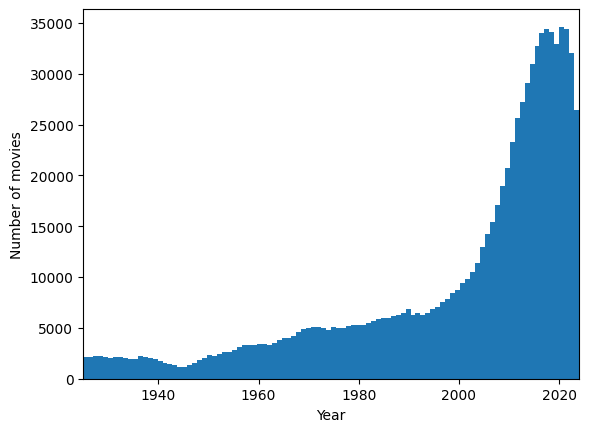

In [3]:
start_year, end_year = 1925, 2024
plt.hist(imdb_data.query('releaseYear >= @start_year and releaseYear <= @end_year')['releaseYear'], bins=end_year-start_year+1)
plt.gca().set(xlabel='Year', ylabel='Number of movies', xlim=[start_year, end_year])
plt.show()

In [ ]:
run_this_cell = False # Only use this cell for dataset acquisition. Otherwise, turn it off so it doesn't accidentally get run.

posters_per_year = 100
MAX_PIXELS = 89478485
if run_this_cell:
    start_time = time.time()
    ia = IMDb()
    for year in np.arange(1925, 2025, dtype=float):
        year_start_time = time.time()
        data_year = imdb_data.query('type == "movie" and releaseYear == @year')
        successful_queries, failed_queries = 0, 0
        iter = 0
        while successful_queries < posters_per_year:
            movie_id = data_year['id'].iloc[iter]
            try:
                movie = ia.get_movie(movie_id[2:])
                poster_url = movie.get('full-size cover url')
                response = requests.get(poster_url)
                img = Image.open(BytesIO(response.content))
                if np.prod(img.size) > MAX_PIXELS:
                    raise Exception('Poster is too large')
                if img.mode != 'RGB':
                    raise Exception('Poster not in RGB')
                filename = f'century_poster_dataset/{movie_id}.jpg'
                img.save(filename)
                successful_queries += 1
            except Exception:
                failed_queries += 1
            iter += 1
        now = time.time()
        num_mins1, num_mins2 = (now - year_start_time) // 60, (now - start_time) // 60
        num_secs1, num_secs2 = (now - year_start_time) % 60, (now - start_time) % 60
        print(f'Completed year {int(year)} in {int(num_mins1)}:{int(num_secs1):02d} with {failed_queries} failed queries. ({int(num_mins2)}:{int(num_secs2):02d} overall so far)')

Completed year 1925 in 8:24 with 120 failed queries. (8:25 overall so far)
Completed year 1926 in 7:45 with 96 failed queries. (16:10 overall so far)
Completed year 1927 in 8:13 with 107 failed queries. (24:24 overall so far)
Completed year 1928 in 12:04 with 216 failed queries. (36:28 overall so far)
Completed year 1929 in 6:47 with 71 failed queries. (43:15 overall so far)
Completed year 1930 in 6:43 with 67 failed queries. (49:59 overall so far)
Completed year 1931 in 9:05 with 130 failed queries. (59:04 overall so far)
Completed year 1932 in 9:03 with 134 failed queries. (68:07 overall so far)
Completed year 1933 in 6:33 with 60 failed queries. (74:41 overall so far)
Completed year 1934 in 10:20 with 169 failed queries. (85:02 overall so far)
Completed year 1935 in 13:12 with 246 failed queries. (98:15 overall so far)
Completed year 1936 in 5:47 with 39 failed queries. (104:02 overall so far)
Completed year 1937 in 10:01 with 154 failed queries. (114:03 overall so far)
Completed ye

c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (98537119 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed year 1999 in 6:14 with 52 failed queries. (508:34 overall so far)
Completed year 2000 in 6:39 with 58 failed queries. (515:13 overall so far)
Completed year 2001 in 6:06 with 40 failed queries. (521:19 overall so far)
Completed year 2002 in 5:57 with 45 failed queries. (527:17 overall so far)
Completed year 2003 in 5:53 with 41 failed queries. (533:10 overall so far)
Completed year 2004 in 5:51 with 35 failed queries. (539:01 overall so far)
Completed year 2005 in 6:56 with 61 failed queries. (545:58 overall so far)
Completed year 2006 in 5:35 with 34 failed queries. (551:33 overall so far)
Completed year 2007 in 6:10 with 47 failed queries. (557:43 overall so far)
Completed year 2008 in 6:16 with 50 failed queries. (564:00 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (97200000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed year 2009 in 5:29 with 30 failed queries. (569:30 overall so far)
Completed year 2010 in 5:46 with 36 failed queries. (575:16 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (97200000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed year 2011 in 5:48 with 42 failed queries. (581:05 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (94414600 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (96776940 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed year 2012 in 5:43 with 33 failed queries. (586:48 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (97200000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed year 2013 in 5:16 with 27 failed queries. (592:05 overall so far)


2024-12-14 22:20:19,507 CRITICAL [imdbpy] c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\imdb\_exceptions.py:32: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt34625516/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': <HTTPError 404: ''>},); kwds: {}
Traceback (most recent call last):
  File "c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\imdb\parser\http\__init__.py", line 233, in retrieve_unicode
    response = uopener.open(url)
               ^^^^^^^^^^^^^^^^^
  File "c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\urllib\request.py", line 525, in open
    response = meth(req, response)
               ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\urllib\request.py", line 634, in http_response
    response = self.parent.error(
               ^^^^^^^^^^^^^^^^^^
  File "c:\Users\

Completed year 2014 in 4:59 with 14 failed queries. (597:04 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (99630000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (94770000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed year 2015 in 5:35 with 29 failed queries. (602:39 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (97200000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (89579520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed year 2016 in 5:18 with 22 failed queries. (607:57 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (97200000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed year 2017 in 5:06 with 20 failed queries. (613:04 overall so far)


2024-12-14 22:41:13,048 CRITICAL [imdbpy] c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\imdb\_exceptions.py:32: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt8426838/plotsummary', 'proxy': '', 'exception type': 'IOError', 'original exception': <HTTPError 500: 'Internal Server Error'>},); kwds: {}
Traceback (most recent call last):
  File "c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\imdb\parser\http\__init__.py", line 233, in retrieve_unicode
    response = uopener.open(url)
               ^^^^^^^^^^^^^^^^^
  File "c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\urllib\request.py", line 525, in open
    response = meth(req, response)
               ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\urllib\request.py", line 634, in http_response
    response = self.parent.error(
               ^^^^^^^^^^^^^^

Completed year 2018 in 5:29 with 25 failed queries. (618:34 overall so far)
Completed year 2019 in 5:12 with 21 failed queries. (623:47 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (110533743 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed year 2020 in 5:03 with 13 failed queries. (628:50 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (99293931 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (92785500 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (100748125 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed year 2021 in 5:11 with 15 failed queries. (634:02 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (97200000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
2024-12-14 23:02:20,466 CRITICAL [imdbpy] c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\imdb\_exceptions.py:32: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt15205026/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': <HTTPError 404: ''>},); kwds: {}
Traceback (most recent call last):
  File "c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\imdb\parser\http\__init__.py", line 233, in retrieve_unicode
    response = uopener.open(url)
               ^^^^^^^^^^^^^^^^^
  File "c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\urllib\request.py", line 525, in open
    response = meth(req, respon

Completed year 2022 in 5:03 with 12 failed queries. (639:05 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (97200000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Completed year 2023 in 4:55 with 9 failed queries. (644:01 overall so far)


c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (97200000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
2024-12-14 23:14:27,767 CRITICAL [imdbpy] c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\imdb\_exceptions.py:32: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt29545068/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': <HTTPError 404: ''>},); kwds: {}
Traceback (most recent call last):
  File "c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\imdb\parser\http\__init__.py", line 233, in retrieve_unicode
    response = uopener.open(url)
               ^^^^^^^^^^^^^^^^^
  File "c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\urllib\request.py", line 525, in open
    response = meth(req, respon

Completed year 2024 in 4:46 with 13 failed queries. (648:47 overall so far)


In [6]:
ids_with_posters = os.listdir('century_poster_dataset')
ids_with_posters = [i[:i.rindex('.')] for i in ids_with_posters]
data_with_posters = imdb_data.query('id in @ids_with_posters & type == "movie"')
data_with_posters

,id,title,type,genres,averageRating,numVotes,releaseYear
267180,tt0877727,Vampires of Warsaw,movie,"Crime, Drama",3.4,8.0,1925.0
197812,tt0333730,Kivalina of the Ice Lands,movie,"Action, Adventure, Drama",4.6,22.0,1925.0
198457,tt0335314,No Rastro do Eldorado,movie,Documentary,7.2,10.0,1925.0
96415,tt0132207,Hedda Gabler,movie,Drama,NaN,NaN,1925.0
96344,tt0132085,The Devil in the City,movie,Drama,6.0,32.0,1925.0
...,...,...,...,...,...,...,...
766441,tt33143789,Bae Dard,movie,Comedy,NaN,NaN,2024.0
638408,tt26659814,Auron Mein Kahan Dum Tha,movie,"Action, Crime, Drama",6.8,40047.0,2024.0
693658,tt29520053,Point of the Pen,movie,"Action, Documentary, Music",NaN,NaN,2024.0
693744,tt29521968,Mina and the Radio Bandits,movie,Documentary,7.9,17.0,2024.0


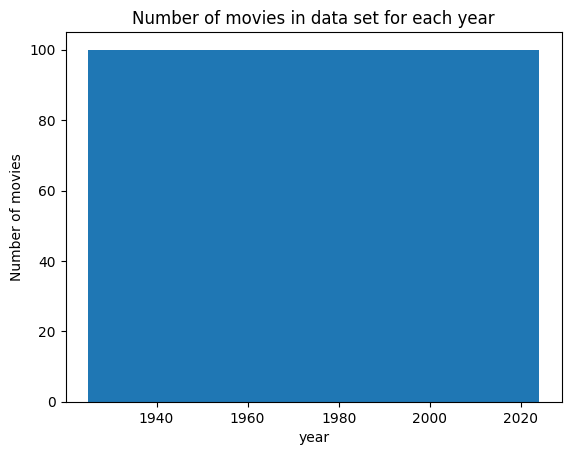

In [7]:
plt.hist(data_with_posters['releaseYear'], bins=len(data_with_posters['releaseYear'].unique()))
plt.gca().set(xlabel='year', ylabel='Number of movies', title='Number of movies in data set for each year')
plt.show()

In [8]:
def sample_movies_by_year(df, start_year, end_year, n, year_column='releaseYear'):
    filtered_df = df[(df[year_column] >= start_year) & (df[year_column] <= end_year)]
    sampled_df = (filtered_df.groupby(year_column, group_keys=False).apply(lambda group: group.sample(n=n, random_state=42)))
    return sampled_df.reset_index(drop=True)

In [9]:
data_with_posters.shape

(10000, 7)

In [10]:
train_df, test_df = train_test_split(data_with_posters, test_size=0.3, stratify=data_with_posters['releaseYear'], random_state=42)

In [12]:
def generate_id_pairs_by_year(df, id_column='id', year_column='releaseYear'):
    year_to_ids = df.groupby(year_column)[id_column].apply(list).to_dict()
    year_combinations = list(combinations(year_to_ids.keys(), 2))
    pairs = []
    for year1, year2 in year_combinations:
        ids1 = year_to_ids[year1]
        ids2 = year_to_ids[year2]
        pairs.extend((int(id1[2:]), int(id2[2:])) for id1 in ids1 for id2 in ids2)
    pairs = np.array(pairs)
    np.random.shuffle(pairs)
    return pairs

In [ ]:
train_pairs = generate_id_pairs_by_year(train_df)
test_pairs = generate_id_pairs_by_year(test_df)
print(f'{train_pairs.shape[0]} training pairs, {test_pairs.shape[0]} testing pairs before downsampling')

downsample_freq = 1000
train_pairs = train_pairs[::downsample_freq]
test_pairs = test_pairs[::downsample_freq]
print(f'{train_pairs.shape[0]} training pairs, {test_pairs.shape[0]} testing pairs after downsampling')

train_labels = np.random.randint(0, 2, len(train_pairs))
test_labels = np.random.randint(0, 2, len(test_pairs))
train_pairs[train_labels==0] = train_pairs[train_labels==0][:, ::-1]
test_pairs[test_labels==0] = test_pairs[test_labels==0][:, ::-1]

24255000 training pairs, 4455000 testing pairs before downsampling


In [14]:
train_pairs.shape, test_pairs.shape

((24255, 2), (4455, 2))

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

poster_dict = {}
for movie_id in data_with_posters['id']:
    poster = np.array(Image.open(f'century_poster_dataset/{movie_id}.jpg'))
    poster_dict[int(movie_id[2:])] = transform(poster)
assert len(poster_dict) == data_with_posters.shape[0]

In [20]:
print(f'Downsampled training pairs: {train_pairs.nbytes / (2**10):.2f}KB')
print(f'Downsampled testing pairs: {test_pairs.nbytes / (2**10):.2f}KB')
print(f'Training labels: {train_labels.nbytes / (2**10):.2f}KB')
print(f'Testing labels: {test_labels.nbytes / (2**10):.2f}KB')
print(f'Poster dict: {sys.getsizeof(poster_dict) / (2**10):.2f}KB')

Downsampled training pairs: 378.98KB
Downsampled testing pairs: 69.61KB
Training labels: 94.75KB
Testing labels: 17.40KB
Poster dict: 288.08KB


#### Model Training

In [52]:
class MoviePairDataset(Dataset):
    def __init__(self, pairs, labels, poster_dict):
        """
        Args:
            pairs (list of tuples): List of movie ID pairs.
            labels (list): List of binary labels (0 or 1).
            poster_dict (dict): Dictionary where keys are movie IDs and values are poster images.
        """
        self.pairs = pairs
        self.labels = labels
        self.poster_dict = poster_dict

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        id1, id2 = self.pairs[idx]
        label = self.labels[idx]

        poster1 = self.poster_dict[id1]
        poster2 = self.poster_dict[id2]

        return poster1, poster2, torch.tensor(label, dtype=torch.long)

In [53]:
class PosterComparisonModel(nn.Module):
    def __init__(self, feature_dim=512):
        super(PosterComparisonModel, self).__init__()
        resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT) # Pretrained feature extractor (ResNet)
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-1]) # Remove the last layer
        self.flatten = nn.Flatten()

        self.fc = nn.Sequential(
            nn.Linear(2 * feature_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )

    def forward(self, poster1, poster2):
        features1 = self.feature_extractor(poster1)
        features1 = self.flatten(features1)
        features2 = self.feature_extractor(poster2)
        features2 = self.flatten(features2)

        combined_features = torch.cat((features1, features2), dim=1)

        out = self.fc(combined_features)
        return out

In [54]:
batch_size = 64

train_dataset = MoviePairDataset(pairs=train_pairs, labels=train_labels, poster_dict=poster_dict)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = MoviePairDataset(pairs=test_pairs, labels=test_labels, poster_dict=poster_dict)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [55]:
print(len(train_loader))
print(len(test_loader))

379
70


In [56]:
# Training loop
def train_model(model, train_loader, optimizer, criterion, device, epoch_num, print_freq=100):
    model.train()
    model.to(device)
    total_loss = 0
    last_printout_time = time.time()
    loss_list, acc_list = [], []
    overall_loss_list, overall_acc_list = [], []
    for i, (poster1, poster2, labels) in enumerate(train_loader):
        poster1, poster2, labels = poster1.to(device), poster2.to(device), labels.to(device)

        # Forward pass
        outputs = model(poster1, poster2)
        loss = criterion(outputs, labels)

        # Backprop and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Get loss and accuracy metrics
        loss_item = loss.item()
        total_loss += loss_item
        loss_list.append(loss_item)
        overall_loss_list.append(loss_item)

        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        total = labels.size(0)
        accuracy = correct / total
        acc_list.append(accuracy)
        overall_acc_list.append(accuracy)

        # Occasionally print results
        if print_freq > 0 and i % print_freq == 0 and i != 0:
            print(f'Epoch {epoch_num} Batch {i}/{len(train_loader)} ({(i/len(train_loader))*100:.1f}%): Batch loss: {loss.item():.2g}, Batch accuracy: {accuracy*100:.2f}%')
            print(f'Avg loss since last printout: {np.mean(loss_list):.2g}, Accuracy since last printout: {np.mean(acc_list)*100:.2f}%')
            print(f'Those {print_freq} batches took {time.time() - last_printout_time:.2f}s.')
            loss_list, acc_list = [], []
            last_printout_time = time.time()
            print('-'*100)

    return overall_loss_list, overall_acc_list

# Testing loop
def test_model(model, test_loader, device):
    model.eval()
    model.to(device)
    accs = []

    with torch.no_grad():
        for poster1, poster2, labels in test_loader:
            poster1, poster2, labels = poster1.to(device), poster2.to(device), labels.to(device)

            # Forward pass
            outputs = model(poster1, poster2)
            _, predicted = torch.max(outputs, 1)

            accs.append((predicted == labels).sum() / labels.size(0))

    return accs

In [ ]:
load_model = False

if load_model:
    model = PosterComparisonModel()
    model.load_state_dict(torch.load('model.pt', weights_only=True))
    model.eval()
else:
    # Initialize model, loss, and optimizer
    model = PosterComparisonModel()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-5)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    num_epochs = 10

    test_accs = []
    train_batch_accs = []
    train_batch_losses = []
    test_batch_accs = []
    initial_test_accs = test_model(model, test_loader, device)
    print(f'Baseline: Test Accuracy: {np.mean(initial_test_accs)*100:.1f}% (Should be around 50%)')
    print('-'*100)
    print('-'*100)
    for epoch in range(num_epochs):
        train_losses, train_accs = train_model(model, train_loader, optimizer, criterion, device, epoch+1, print_freq=50)
        test_accs = test_model(model, test_loader, device)
        train_batch_accs.extend(train_accs)
        train_batch_losses.extend(train_losses)
        test_batch_accs.extend(test_accs)

        print('-'*100)
        print(f"Epoch {epoch + 1}, Loss: {np.mean(train_losses):.4f}, Test Accuracy: {np.mean(test_accs)*100:.2f}%")
        print('-'*100)
        print('-'*100)

c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Rickr\miniconda3\envs\elec576_final_project_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Baseline: Test Accuracy: 48.2% (Should be around 50%)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Epoch 1 Batch 20: Loss: 0.71, Accuracy: 50.00%
Avg loss since last printout: 0.7, Accuracy since last printout: 50.00%
Those 20 batches took 164.83s.
----------------------------------------------------------------------------------------------------
Epoch 1 Batch 40: Loss: 0.68, Accuracy: 53.12%
Avg loss since last printout: 0.67, Accuracy since last printout: 59.38%
Those 20 batches took 145.05s.
----------------------------------------------------------------------------------------------------
Epoch 1 Batch 60: Loss: 0.65, Accuracy: 62.50%
Avg loss since last printout: 0.66, Accuracy since last printout: 63.75%
Those 20 batches took 178.28s.
------------------------------------------------------------------------------------------

In [ ]:
save_model = True
if save_model:
    torch.save(model.state_dict(), 'model_corrected.pt')

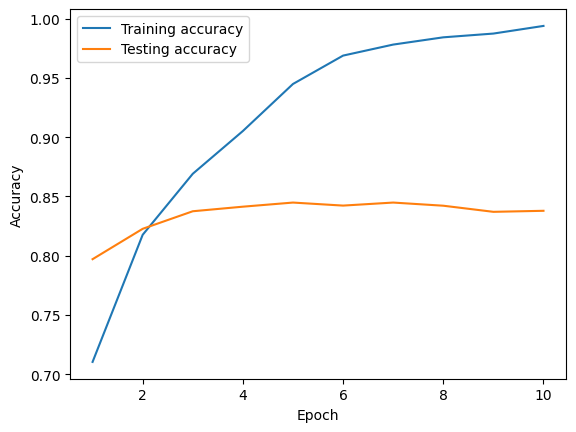

In [ ]:
train_batch_accs = np.array(train_batch_accs)
train_batch_losses = np.array(train_batch_losses)
test_batch_accs = np.array(test_batch_accs)
train_epoch_accs = np.mean(train_batch_accs.reshape((num_epochs, -1)), axis=1)
train_epoch_losses = np.mean(train_batch_losses.reshape((num_epochs, -1)), axis=1)
test_epoch_accs = np.mean(test_batch_accs.reshape((num_epochs, -1)), axis=1)
plt.plot(range(1, num_epochs+1), train_epoch_accs, label='Training accuracy')
plt.plot(range(1, num_epochs+1), test_epoch_accs, label='Testing accuracy')
plt.legend()
plt.gca().set(xlabel='Epoch', ylabel='Accuracy')
plt.show()

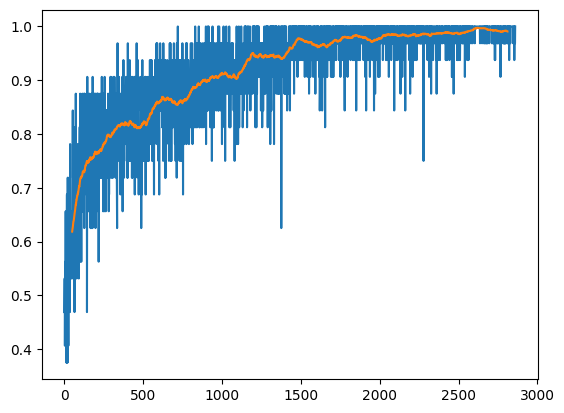

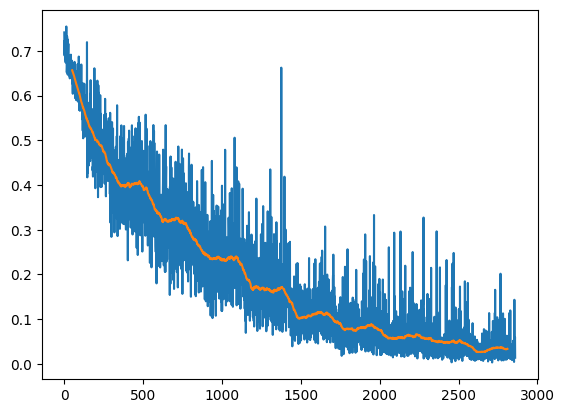

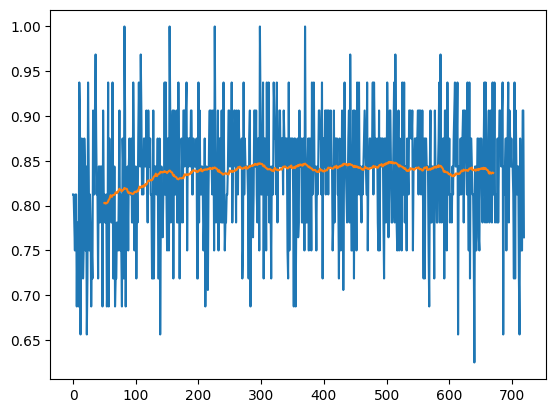

In [ ]:
def rolling_average(a, n=10):
    return np.convolve(a, np.ones(n), 'valid') / n

rolling_average_window_size = 100
plt.plot(train_batch_accs)
plt.plot(range(rolling_average_window_size//2, len(train_batch_accs) - (rolling_average_window_size // 2)+1), rolling_average(train_batch_accs, n=rolling_average_window_size))
plt.show()
plt.plot(train_batch_losses)
plt.plot(range(rolling_average_window_size//2, len(train_batch_losses) - (rolling_average_window_size // 2)+1), rolling_average(train_batch_losses, n=rolling_average_window_size))
plt.show()
plt.plot(test_batch_accs)
plt.plot(range(rolling_average_window_size//2, len(test_batch_accs) - (rolling_average_window_size // 2)+1), rolling_average(test_batch_accs, n=rolling_average_window_size))
plt.show()

#### Test model by constructing confusion matrix

In [ ]:
num_per_year = 20

cm_id_pairs = []
cm_years = []
for year1 in data_with_posters['releaseYear'].unique():
    for year2 in data_with_posters['releaseYear'].unique():
        if year1 == year2:
            continue
        year1_ids = data_with_posters.query('releaseYear==@year1')['id'].values
        year1_ids = year1_ids[np.random.choice(len(year1_ids), num_per_year, replace=False)]
        year1_ids = np.array([int(id[2:]) for id in year1_ids])
        year2_ids = data_with_posters.query('releaseYear==@year2')['id'].values
        year2_ids = year2_ids[np.random.choice(len(year2_ids), num_per_year, replace=False)]
        year2_ids = np.array([int(id[2:]) for id in year2_ids])
        np.random.shuffle(year2_ids)
        
        both_years_ids = np.vstack((year1_ids, year2_ids)).T
        cm_id_pairs.append(both_years_ids)
        cm_years.append(np.array([[year1, year2]]*num_per_year))
cm_id_pairs = np.vstack(cm_id_pairs)
cm_years = np.vstack(cm_years)

cm_dataset = MoviePairDataset(pairs=cm_id_pairs, labels=cm_years, poster_dict=poster_dict)
cm_loader = DataLoader(cm_dataset, batch_size=128, shuffle=False)
print(f'{len(cm_loader)} batches, {cm_id_pairs.shape[0]} pairs')

1425 batches, 182400 pairs


In [ ]:
num_years = int(len(data_with_posters['releaseYear'].unique()))
confusion_matrix = np.zeros((num_years, num_years)).astype('int32')
first_year = int(data_with_posters['releaseYear'].min())
printout_freq = 100
print_start_time = time.time()

with torch.no_grad():
    model.eval()
    for batch_num, (poster1, poster2, years) in enumerate(cm_loader):
        batch_start_time = time.time()
        poster1, poster2, years = poster1.to(device), poster2.to(device), (years-first_year).to(device)
        labels = (years[:,0] < years[:,1]).to(torch.int32)

        # Forward pass
        outputs = model(poster1, poster2)
        _, predicted = torch.max(outputs, 1)

        correct = predicted == labels
        np.add.at(confusion_matrix, tuple(years[correct].T), 1)

        if batch_num != 0 and batch_num % printout_freq == 0:
            time_now = time.time()
            print(f'Completed {batch_num+1}/{len(cm_loader)} batches.')
            print(f'Time taken: Last batch {int(time_now - batch_start_time)}s, last {printout_freq} batches {time_now - print_start_time:.2f}s.')
            print_start_time = time.time()
confusion_matrix_copy = confusion_matrix.copy()

Completed 101/1425 batches.
Time taken: Last batch 10.98s, last 100 batches 1030.86s.
Completed 201/1425 batches.
Time taken: Last batch 9.00s, last 100 batches 999.97s.
Completed 301/1425 batches.
Time taken: Last batch 8.61s, last 100 batches 902.05s.
Completed 401/1425 batches.
Time taken: Last batch 9.20s, last 100 batches 1010.45s.
Completed 501/1425 batches.
Time taken: Last batch 9.65s, last 100 batches 979.31s.
Completed 601/1425 batches.
Time taken: Last batch 8.13s, last 100 batches 909.02s.
Completed 701/1425 batches.
Time taken: Last batch 7.86s, last 100 batches 826.12s.
Completed 801/1425 batches.
Time taken: Last batch 9.21s, last 100 batches 846.50s.
Completed 901/1425 batches.
Time taken: Last batch 9.00s, last 100 batches 921.07s.
Completed 1001/1425 batches.
Time taken: Last batch 10.30s, last 100 batches 940.12s.
Completed 1101/1425 batches.
Time taken: Last batch 10.97s, last 100 batches 1049.58s.
Completed 1201/1425 batches.
Time taken: Last batch 10.78s, last 100

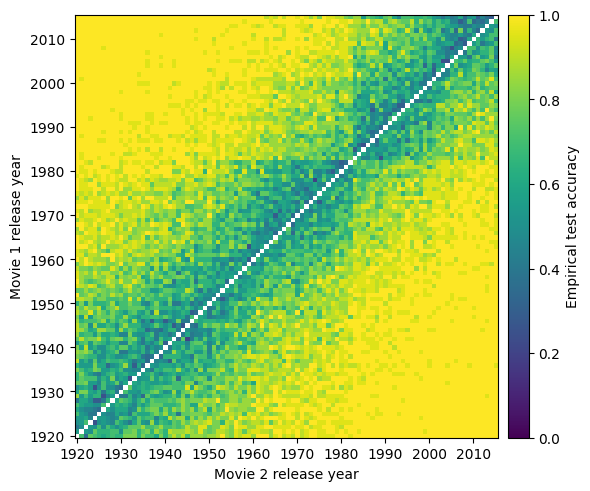

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(6,6))
cmap = plt.cm.viridis
norm = plt.Normalize(confusion_matrix.min(), confusion_matrix.max())
rgba = cmap(norm(confusion_matrix))
rgba[range(len(confusion_matrix)), range(len(confusion_matrix)), :3] = 1, 1, 1

cax = ax.imshow(rgba, vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(cax, cax=cbar_ax, label='Empirical test accuracy')

ax.invert_yaxis()
range_number, coef, offset = 10, 10, first_year
ax.set_xticks([coef*i for i in range(range_number)], [coef*i+offset for i in range(range_number)])
ax.set_yticks([coef*i for i in range(range_number)], [coef*i+offset for i in range(range_number)])

ax.set(ylabel='Movie 1 release year', xlabel='Movie 2 release year',
       xticks=[coef*i for i in range(range_number)], yticks=[coef*i for i in range(range_number)],
       xticklabels=[coef*i+offset for i in range(range_number)], yticklabels=[coef*i+offset for i in range(range_number)])
fig.tight_layout()
plt.show()

In [ ]:
def sum_near_diagonal(matrix, n, num_per_year=10):
    rows, cols = matrix.shape
    near_diagonal_cnt, near_diagonal_total = 0, 0
    far_from_diagonal_cnt, far_from_diagonal_total = 0, 0
    on_diagonal_cnt, on_diagonal_total = 0, 0
    for i in range(rows):
        for j in range(cols):
            if i == j:
                continue
            elif abs(i - j) <= n:
                near_diagonal_cnt += matrix[i, j]
                near_diagonal_total += num_per_year
            else:
                far_from_diagonal_cnt += matrix[i, j]
                far_from_diagonal_total += num_per_year
            if abs(i - j) == n:
                on_diagonal_cnt += matrix[i, j]
                on_diagonal_total += num_per_year

    return (near_diagonal_cnt, near_diagonal_total,
            far_from_diagonal_cnt, far_from_diagonal_total,
            on_diagonal_cnt, on_diagonal_total)

In [ ]:
n = 22
close_cnt, close_total, far_cnt, far_total, on_cnt, on_total = sum_near_diagonal(confusion_matrix, n, num_per_year)

overall_model_acc = np.sum(confusion_matrix) / (num_per_year * (confusion_matrix.size - num_years))

print(f'Accuracy for samples within {n} years of one another: {(close_cnt / close_total)*100:.2f}%')
print(f'Accuracy for samples >{n} years apart: {(far_cnt / far_total)*100:.2f}%')

Accuracy for samples within 22 years of one another: 67.79%
Accuracy for samples >22 years apart: 94.84%


In [ ]:
accs_within_n = []
accs_outside_n = []
accs_at_n = []
on_totals = []

for n in range(1, num_years-1):
    close_cnt, close_total, far_cnt, far_total, on_cnt, on_total = sum_near_diagonal(confusion_matrix, n, num_per_year)
    accs_within_n.append(close_cnt / close_total)
    accs_outside_n.append(far_cnt / far_total)
    accs_at_n.append(on_cnt / on_total)
    on_totals.append(on_total)

accs_within_n = np.array(accs_within_n)
accs_outside_n = np.array(accs_outside_n)
accs_at_n = np.array(accs_at_n)

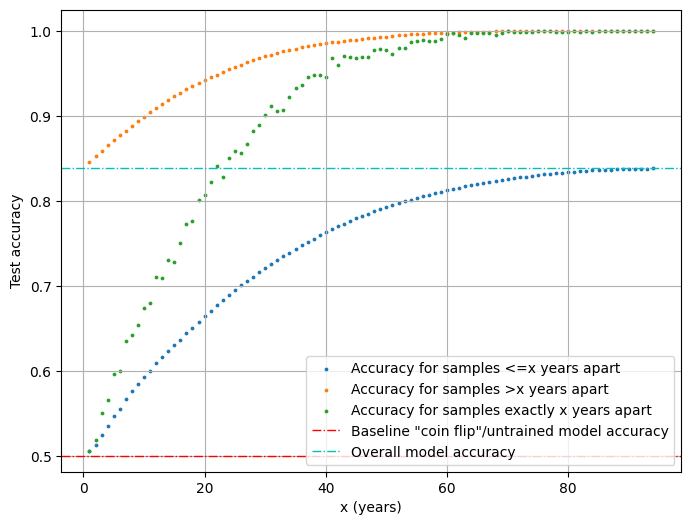

In [ ]:
fig = plt.figure(figsize=(8,6))

plt.scatter(range(1, num_years-1), accs_within_n, label='Accuracy for samples <=x years apart', s=3)
plt.scatter(range(1, num_years-1), accs_outside_n, label='Accuracy for samples >x years apart', s=3)
plt.scatter(range(1, num_years-1), accs_at_n, label='Accuracy for samples exactly x years apart', s=3)

plt.axhline(y=.5, color='r', linestyle='-.', lw=1, label='Baseline "coin flip"/untrained model accuracy')
plt.axhline(y=overall_model_acc, color='c', linestyle='-.', lw=1, label='Overall model accuracy')

plt.legend()

plt.xlabel('x (years)')
plt.ylabel('Test accuracy')
plt.grid()
plt.show()

In [ ]:
conf_threshold = 0.9
conf_interval_years = np.where(np.array(accs_outside_n) > conf_threshold)[0][0] + 1
acc_within_that_year = accs_within_n[conf_interval_years-1]
print(conf_interval_years)
print('%.3f%%' % acc_within_that_year)

11
0.600%
